# Colloids : DLVO theory and stability

Cette théorie permet de calculer les interactions colloïdales dues aux effets électrostatiques et aux interactions de Van der Waals.

Dans le code ci-dessous, le calcul est effectué pour entre 2 sphères dans un électrolyte symétrique.
$$V=V_R+V_A=64\pi a n_0k_BT\lambda_D^2\Gamma_0^2e^{-\frac{d}{\lambda_D}}-\frac{Aa}{12d}$$
où $\Gamma_0=tanh(\frac{z \zeta e}{k_B T})$.

Le code calcule la hauteur de la barrière de potentiel (maximum des énergies d'intéraction) et trace l'énergie potentielle d'interaction en fonction de la distance de séparation entre les deux sphères. 

Le code détermine ensuite la concentration critique de coagulation (c.c.c.) en cherchant pour quelle concentration en sel la barrière de potentiel est nulle.

Le code calcule ensuite le rapport de stabilité par intégration du profil d'interaction :
$$W=2a\int_{2a}^{\infty} e^{\frac{V}{kT}} \frac{dh}{(h+2a)^2} \$$


c0 	 V_max
1e-05 	 36.26
0.0001 	 31.88
0.001 	 24.43
0.01 	 12.33
0.1 	 -0.2
la concentration critique de coagulation est = 0.055 mol/L
La règle de Schulze-Hardy donne pour la ccc 51.671 mol/m3


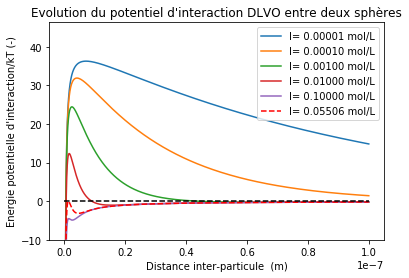

c(M) 	 W 			 t 1/2 (s) 		 t 1/2 (jrs)
0.001 	 336213004.46838474 	 2567231213.998475 	 29713.32423609346
0.003 	 1514190.3458081863 	 11561946.349578086 	 133.81882349048712
0.01 	 1066.9358226933077 	 8146.832249045162 	 0.09429203991950419
0.03 	 1.2287960457293512 	 9.38275296406902 	 0.00010859667782487292
0.0551 	 0.7828888737856383 	 5.977926871248067 	 6.918896841722299e-05
0.1 	 0.7775913818959482 	 5.93747666154657 	 6.872079469382604e-05


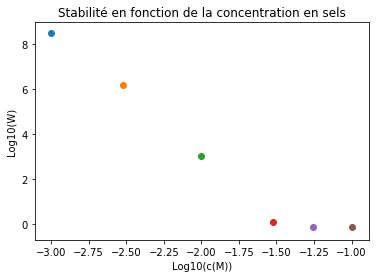

In [5]:
#calcul des interactions colloïdales entre 2 sphères dans un électrolyte symétrique
#détermination de la concentration critique de coagulation
#calcul de la stabilité par intégration du profil d'interaction

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

k=1.38064852e-23 #m2 kg s-2 K-1
T=298
avo=6.02214076e23
kT=k*T
e=1.6e-19
#colloids
a=1e-7 
A=1e-20
zeta=-0.02
#solution 
c0=[0.00001,0.0001,0.001, 0.01,0.1] #mol/L
z=1.
#allocation variable
maxi=np.zeros(len(c0))
print ('c0 \t V_max')

#Fonctions pour le calcul de VR -repulsion- et VA -attraction-
def VR(d,zeta,c):
    I=z**2*c
    n0=c*1e3*avo
    lamD=3.07e-10/np.sqrt(I)
    gam0=np.tanh(z*zeta*e/(4*kT))
    return 64*np.pi*a*n0*kT*(lamD**2)*(gam0**2)*np.exp(-d/lamD)
def VA(d):
    return -A*a/(12*d)

#Calcul et tracé de l'énergie potentielle d'interaction en fonction de la distance, d, inter-particules
#pour les différentes concentrations en sel
d=np.logspace(-10,-7,1000)
for i in range(len(c0)): 
    V=(VR(d,zeta,c0[i])+VA(d))/kT
    maxi[i]=max(V)
    print (c0[i],'\t',round(maxi[i],2))
    I=z**2*c0[i]
    plt.plot(d,V, label='I= %.5f mol/L' %I)

#fonction pour le calcul du max de la barrière de potentiel -> ccc
def f(c):
    V=(VR(d,zeta,c)+VA(d))/kT
    return max(V)

ccrit= newton(f,x0=0.001)
print ('la concentration critique de coagulation est =', round(ccrit,3),'mol/L')
ccrit_SH=3.8e-36*(np.tanh(z*zeta*e/(4*kT)))**4/(A**2*z**6)
print ('La règle de Schulze-Hardy donne pour la ccc', round(ccrit_SH,3),'mol/m3')


V=(VR(d,zeta,ccrit)+VA(d))/kT
plt.plot(d,V, 'r--', label='I= %.5f mol/L' %ccrit)
plt.title('Evolution du potentiel d\'interaction DLVO entre deux sphères')
plt.xlabel('Distance inter-particule  (m)')
plt.ylabel('Energie potentielle d\'interaction/kT (-)')
plt.plot([0,1e-7],[0,0],'k--')
plt.legend(loc='best')
plt.ylim(-10,)
plt.show()

#calcul de la stabilité
from scipy.integrate import quad
print ('c(M) \t W \t\t\t t 1/2 (s) \t\t t 1/2 (jrs)')
phi=1e-4
mu=1e-3
def stab(d, c):
    return 2*a*np.exp((VR(d,zeta,c)+VA(d))/kT)/((d+2*a)**2)

for cw in [0.001,0.003,0.01,0.03,round(ccrit,4),0.1]:
    W = quad(stab, 1e-10, 1e-5, args=(cw))
    tdemi=W[0]*np.pi*mu*a**3/(kT*phi)
    print (cw,'\t',W[0], '\t', tdemi,'\t', tdemi/(3600*24))
    plt.scatter(np.log10(cw),np.log10(W[0]))

plt.title('Stabilité en fonction de la concentration en sels')
plt.xlabel('Log10(c(M))')
plt.ylabel('Log10(W)')    
plt.show()

